# Lab 6: Illumina MiSeq

## Terminal Input: human genome

bowtie2 -p 8 --very-fast --no-unal -x /data/references/hg19/hg19 -1 /data/Lab6_data/mixed_reads1.fastq -2 /data/Lab6_data/mixed_reads2.fastq -S output.sam --un-conc unaligned.fastq

## Terminal Output: human genome
1285441 reads; of these:
    - 1285441 (100.00%) were paired; of these:
    - 1285105 (99.97%) aligned concordantly 0 times
    - 114 (0.01%) aligned concordantly exactly 1 time
    - 222 (0.02%) aligned concordantly >1 times
    
    - 1285105 pairs aligned concordantly 0 times; of these:
        - 227762 (17.72%) aligned discordantly 1 time

    - 1057343 pairs aligned 0 times concordantly or discordantly; of these:
        - 2114686 mates make up the pairs; of these:
            - 2062758 (97.54%) aligned 0 times
            - 15162 (0.72%) aligned exactly 1 time
            - 36766 (1.74%) aligned >1 times
19.76% overall alignment rate


***Questions:***

1. What will you use for the database? /data/references/hg19/hg19
2. Input reads? /data/Lab6_data/
3. If you use the --un unaligned.fastq option, what will unaligned.fastq contain? it will contain reads that were not aligned into a separate fastq file 
4. What percentage of your sequencing library came from contaminating human DNA? 19.76%



## Terminal Input: Shewanella oneidensis Genome

 bowtie2 -p 4 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -1 unaligned.1.fastq -2 unaligned.2.fastq -S ref.sam


## Terminal Output: Shewanella oneidensis Genome

1285105 reads; of these:
    - 1285105 (100.00%) were paired; of these:
    - 1049640 (81.68%) aligned concordantly 0 times
    - 220987 (17.20%) aligned concordantly exactly 1 time
    - 14478 (1.13%) aligned concordantly >1 times
 
 
    - 1049640 pairs aligned concordantly 0 times; of these:
        - 288853 (27.52%) aligned discordantly 1 time
    
    
    - 760787 pairs aligned 0 times concordantly or discordantly; of these:
        - 1521574 mates make up the pairs; of these:
            - 1245335 (81.85%) aligned 0 times
            - 221076 (14.53%) aligned exactly 1 time
            - 55163 (3.63%) aligned >1 times
51.55% overall alignment rate

***Questions:***
1. If you use the --un unaligned.fastq option, what will unaligned.fastq contain? it will contain reads that were not aligned into a separate fastq file 
2. What percentage of your filtered library didn’t align to the reference genome? 51.55%
3. If you use --very-sensitive instead of --very-fast, does this percentage increase or decrease? decrease

***Questions:***
1. How many reads map to humans? 1285441
2. How many map to S. oneidensis? 1285105
3. Do the reads cover the S. oneidensis genome uniformly? no

## Scatter Plot and Histogram:

***Terminal Command to convert ref.sam to ref.bam:***

samtools view -b ref.sam > ref.bam

***Sort ref.bam then index it***

samtools sort ref.bam > ref.sorted.bam
samtools index ref.sorted.bam

***Create the depth file for the plots***
samtools depth -a ref.sorted.bam > ref_depth.tab

In [8]:
import matplotlib.pyplot as plt
import numpy as np

countnm = []
depthv = []

depth = open("ref_depth.tab")
for sample in depth:
    splitted = sample.strip().split('\t')
    countnm.append(int(splitted[1]))
    depthv.append(int(splitted[2]))

In [7]:
maxl = max(depthv)
minl = min(depthv)
meanl = np.mean(depthv)

***Questions:***
1. What is the min, max, and mean coverage across all positions? 
    - min:1
    - max: 472
    - mean~ 70.0102751

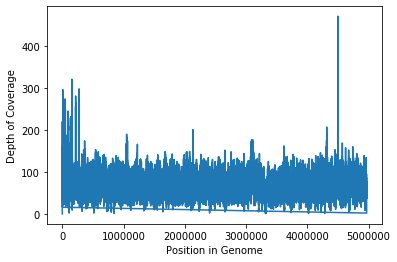

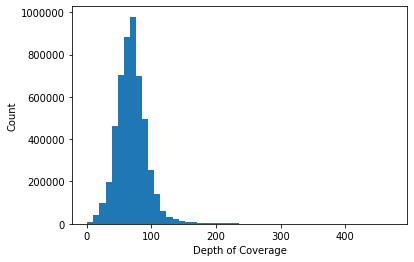

In [12]:
plt.plot(position_num, depth_value)
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show()
plt.hist(depth_value, bins = 50)
plt.xlabel("Depth of Coverage")
plt.ylabel("Count")
plt.show()